In [1]:
from keras_preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt

(512, 512)
(512, 380, 3)


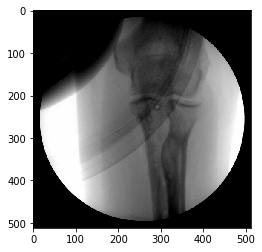

In [3]:
elbow_train = pd.read_csv("trainset_elbow.csv", names=['filename', 'abnormal'])
img=plt.imread(elbow_train.loc[0].filename)
print(img.shape)
plt.imshow(img, cmap="gray")
trainset_df = pd.read_csv("trainset.csv", names=['filename', 'abnormal'])
img=plt.imread(trainset_df.loc[0].filename)
print(img.shape)

Above image is of 512x512 pixels and image size varies from dimensions to grayscale and RGB, hence need to reshape to feed into ResNet (224x224 pixels)

## Initialising ImageDataGenerator

In [4]:
humerus_train = pd.read_csv("trainset_humerus.csv", names=['filename', 'abnormal'])
humerus_val = pd.read_csv("testset_humerus.csv", names=['filename', 'abnormal'])

In [5]:
train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range = 45, horizontal_flip = True)
img_size = 224
b_size = 8
ep = 20
train_generator = train_data_gen.flow_from_dataframe(dataframe = humerus_train, directory = None,
                                        x_col = 'filename', y_col = 'abnormal', target_size=(img_size, img_size),
                                        batch_size=b_size, seed = 1, shuffle = True, color_mode = 'rgb',
                                        class_mode = 'binary', drop_duplicates=False)
val_datagen = ImageDataGenerator(rescale=1. / 255)
val_generator = val_datagen.flow_from_dataframe(humerus_val, directory = None, x_col = 'filename', y_col='abnormal',
                                target_size = (img_size, img_size), shuffle=True, class_mode='binary', batch_size=b_size)

Found 1272 images belonging to 2 classes.
Found 288 images belonging to 2 classes.


## Instantiating ResNet50 Model

In [21]:
from keras.applications import ResNet50
humerus_model = ResNet50(include_top=True, weights=None, classes=1)
humerus_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [23]:
from keras.optimizers import Adam
from keras import losses
from keras.callbacks import EarlyStopping, ModelCheckpoint
stop = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint('humerus_model.h5', verbose=1, save_best_only=True)
humerus_model.compile(optimizer=Adam(lr=0.01, decay=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
humerus_model.fit_generator(train_generator, steps_per_epoch=b_size, epochs=ep, 
                            validation_data=val_generator, validation_steps=1, workers=2, 
                            use_multiprocessing=False, callbacks = [stop, checkpoint])

Epoch 1/20
8/8 [==============================] - 218s 27s/step - loss: 7.7221 - acc: 0.5156 - val_loss: 5.9784 - val_acc: 0.6250

Epoch 00001: val_loss improved from inf to 5.97839, saving model to humerus_model.h5
Epoch 2/20
8/8 [==============================] - 163s 20s/step - loss: 8.2203 - acc: 0.4844 - val_loss: 7.9712 - val_acc: 0.5000

Epoch 00002: val_loss did not improve from 5.97839
Epoch 3/20
8/8 [==============================] - 158s 20s/step - loss: 10.7113 - acc: 0.3281 - val_loss: 5.9784 - val_acc: 0.6250

Epoch 00003: val_loss did not improve from 5.97839
Epoch 4/20
8/8 [==============================] - 159s 20s/step - loss: 8.9676 - acc: 0.4375 - val_loss: 5.9784 - val_acc: 0.6250

Epoch 00004: val_loss did not improve from 5.97839
Epoch 5/20
8/8 [==============================] - 160s 20s/step - loss: 7.7221 - acc: 0.5156 - val_loss: 9.9640 - val_acc: 0.3750

Epoch 00005: val_loss did not improve from 5.97839
Epoch 6/20
8/8 [==============================] - 162s 

In [25]:
humerus_model.save('humerus_model.h5')

In [ ]:
#humerus_model = load_model('humerus_model.h5')

## Functional Implementation for Training ResNet50 Model for other categories of images

ImageDataGenerator

In [26]:
def train_gen(DATAFRAME):
    train_generator = train_data_gen.flow_from_dataframe(dataframe = DATAFRAME, directory = None,
                                        x_col = 'filename', y_col = 'abnormal', target_size=(img_size, img_size),
                                        batch_size=b_size, seed = 1, shuffle = True, color_mode = 'rgb',
                                        class_mode = 'binary', drop_duplicates=False)
    return train_generator
def val_gen(DATARFRAME):
    return val_datagen.flow_from_dataframe(DATAFRAME, directory = None, x_col = 'filename', y_col='abnormal',
                                target_size = (img_size, img_size), shuffle=True, class_mode='binary', batch_size=b_size)